# LabAssignment 5

1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://raw.githubusercontent.com/shreyakumari9504/DSDBA/main/diabetes.csv"
dataset = pd.read_csv(url)

In [3]:
dataset

,Age,BMI,Blood Pressure,Glucose Level,Insulin,Outcome
0,25,22.0,80,95,15,0
1,32,27.8,85,120,40,0
2,47,30.5,90,150,60,1
3,55,31.2,88,110,55,1
4,29,24.7,78,100,20,0
5,60,35.0,95,180,70,1
6,40,28.4,82,125,45,0
7,70,34.6,92,160,65,1
8,50,29.0,89,140,50,1
9,38,23.6,85,105,25,0


In [4]:
dataset.head()

,Age,BMI,Blood Pressure,Glucose Level,Insulin,Outcome
0,25,22.0,80,95,15,0
1,32,27.8,85,120,40,0
2,47,30.5,90,150,60,1
3,55,31.2,88,110,55,1
4,29,24.7,78,100,20,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48 non-null     int64  
 1   BMI             48 non-null     float64
 2   Blood Pressure  48 non-null     int64  
 3   Glucose Level   48 non-null     int64  
 4   Insulin         48 non-null     int64  
 5   Outcome         48 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 2.4 KB


In [6]:
dataset.describe()

,Age,BMI,Blood Pressure,Glucose Level,Insulin,Outcome
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,45.270833,30.289583,87.291667,131.729167,48.750000,0.500000
std,11.142672,3.728455,4.135772,20.319511,14.458304,0.505291
min,25.000000,22.000000,78.000000,95.000000,15.000000,0.000000
25%,37.000000,27.950000,85.000000,115.000000,40.000000,0.000000
50%,44.500000,30.450000,88.000000,130.000000,50.000000,0.500000
75%,54.250000,33.125000,90.250000,146.250000,60.000000,1.000000
max,70.000000,36.800000,95.000000,180.000000,70.000000,1.000000


In [7]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

print(X[:3, :])
print('-'*15)
print(y[:3])


[[ 80  95]
 [ 85 120]
 [ 90 150]]
---------------
[15 40 60]


In [8]:
dataset.tail()

,Age,BMI,Blood Pressure,Glucose Level,Insulin,Outcome
43,43,32.8,86,125,50,0
44,32,27.6,87,110,40,0
45,47,33.2,92,145,60,1
46,41,30.0,84,130,55,0
47,60,36.4,90,155,65,1


In [9]:
dataset["Outcome"].value_counts(normalize=True)

Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64

In [10]:
x=dataset.drop(["Outcome"],axis=1)


In [11]:
y=dataset["Outcome"]

In [12]:
x

,Age,BMI,Blood Pressure,Glucose Level,Insulin
0,25,22.0,80,95,15
1,32,27.8,85,120,40
2,47,30.5,90,150,60
3,55,31.2,88,110,55
4,29,24.7,78,100,20
5,60,35.0,95,180,70
6,40,28.4,82,125,45
7,70,34.6,92,160,65
8,50,29.0,89,140,50
9,38,23.6,85,105,25


In [13]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     1
8     1
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17    0
18    1
19    0
20    1
21    0
22    1
23    0
24    1
25    0
26    1
27    0
28    1
29    0
30    1
31    0
32    1
33    1
34    0
35    1
36    0
37    0
38    1
39    0
40    1
41    0
42    1
43    0
44    0
45    1
46    0
47    1
Name: Outcome, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_x, test_x, train_y , test_y =train_test_split(x,y,test_size=0.2,random_state=42)


In [16]:
train_x

,Age,BMI,Blood Pressure,Glucose Level,Insulin
8,50,29.0,89,140,50
3,55,31.2,88,110,55
6,40,28.4,82,125,45
39,41,29.7,83,130,45
33,53,32.3,91,130,50
13,37,28.5,80,105,30
17,35,25.5,86,110,40
45,47,33.2,92,145,60
15,30,24.3,78,98,20
9,38,23.6,85,105,25


In [17]:
test_x

,Age,BMI,Blood Pressure,Glucose Level,Insulin
27,36,29.3,87,115,40
40,55,34.3,89,150,65
26,54,33.0,92,145,65
43,43,32.8,86,125,50
24,42,32.0,86,120,45
37,31,28.0,86,120,40
12,51,32.0,91,145,55
19,43,28.2,88,120,45
4,29,24.7,78,100,20
25,45,31.5,85,135,50


In [18]:
train_y

8     1
3     1
6     0
39    0
33    1
13    0
17    0
45    1
15    0
9     0
16    1
29    0
32    1
46    0
0     0
31    0
30    1
5     1
11    0
34    0
1     0
44    0
21    0
2     1
36    0
35    1
23    0
41    0
10    1
22    1
18    1
47    1
20    1
7     1
42    1
14    1
28    1
38    1
Name: Outcome, dtype: int64

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler=MinMaxScaler()
scaler

MinMaxScaler()

In [21]:
cols=train_x.columns
cols

Index(['Age', 'BMI', 'Blood Pressure', 'Glucose Level', 'Insulin'], dtype='object')

In [22]:
train_x_scaled=scaler.fit_transform(train_x)
train_x_scaled

array([[0.55555556, 0.47297297, 0.64705882, 0.52941176, 0.63636364],
       [0.66666667, 0.62162162, 0.58823529, 0.17647059, 0.72727273],
       [0.33333333, 0.43243243, 0.23529412, 0.35294118, 0.54545455],
       [0.35555556, 0.52027027, 0.29411765, 0.41176471, 0.54545455],
       [0.62222222, 0.69594595, 0.76470588, 0.41176471, 0.63636364],
       [0.26666667, 0.43918919, 0.11764706, 0.11764706, 0.27272727],
       [0.22222222, 0.23648649, 0.47058824, 0.17647059, 0.45454545],
       [0.48888889, 0.75675676, 0.82352941, 0.58823529, 0.81818182],
       [0.11111111, 0.15540541, 0.        , 0.03529412, 0.09090909],
       [0.28888889, 0.10810811, 0.41176471, 0.11764706, 0.18181818],
       [0.84444444, 0.81756757, 0.82352941, 0.70588235, 0.81818182],
       [0.08888889, 0.20945946, 0.35294118, 0.35294118, 0.36363636],
       [0.26666667, 0.35135135, 0.41176471, 0.23529412, 0.45454545],
       [0.35555556, 0.54054054, 0.35294118, 0.41176471, 0.72727273],
       [0.        , 0.        , 0.

In [23]:
train_x_scaled=pd.DataFrame(train_x_scaled,columns=cols)

In [24]:
train_x_scaled

,Age,BMI,Blood Pressure,Glucose Level,Insulin
0,0.555556,0.472973,0.647059,0.529412,0.636364
1,0.666667,0.621622,0.588235,0.176471,0.727273
2,0.333333,0.432432,0.235294,0.352941,0.545455
3,0.355556,0.520270,0.294118,0.411765,0.545455
4,0.622222,0.695946,0.764706,0.411765,0.636364
5,0.266667,0.439189,0.117647,0.117647,0.272727
6,0.222222,0.236486,0.470588,0.176471,0.454545
7,0.488889,0.756757,0.823529,0.588235,0.818182
8,0.111111,0.155405,0.000000,0.035294,0.090909
9,0.288889,0.108108,0.411765,0.117647,0.181818


In [25]:
from sklearn.linear_model import LogisticRegression as LogReg

In [26]:
logreg=LogReg()

In [27]:
logreg.fit(train_x,train_y)

LogisticRegression()

In [28]:
train_predict=logreg.predict(train_x)
test_predict=logreg.predict(test_x)

In [29]:
train_predict

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
test_predict

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [31]:
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve


In [32]:
from mlxtend.plotting import plot_confusion_matrix


ModuleNotFoundError: No module named 'mlxtend'

In [33]:
f1_score(train_predict,train_y)

0.9047619047619048

In [34]:
f1_score(test_predict,test_y)

0.8

In [35]:
conf1=confusion_matrix(train_y,train_predict)

In [36]:
conf1

array([[15,  3],
       [ 1, 19]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(test_y, test_predict)
conf_matrix = confusion_matrix(test_y, test_predict)
accuracy

0.8

In [39]:
conf_matrix

array([[4, 2],
       [0, 4]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(test_y, test_predict))

Accuracy: 0.8
Confusion Matrix:
[[4 2]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.67      1.00      0.80         4

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10



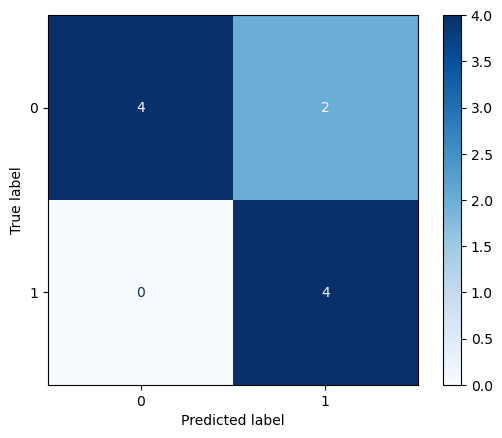

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, test_predict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap="Blues")  # You can change the color map if needed
plt.show()


In [47]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(test_y, test_predict)

# Extract values
true_negative  = conf_matrix[0][0]  # TN
false_positive = conf_matrix[0][1]  # FP
false_negative = conf_matrix[1][0]  # FN
true_positive  = conf_matrix[1][1]  # TP

# Print values
print(f"True Negative: {true_negative}")
print(f"False Positive: {false_positive}")
print(f"False Negative: {false_negative}")
print(f"True Positive: {true_positive}")


True Negative: 4
False Positive: 2
False Negative: 0
True Positive: 4


In [49]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive)
Accuracy
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8

In [50]:
Accuracy

1.3333333333333333

In [51]:
Precision

0.6666666666666666

In [52]:
Recall

1.0

In [53]:
F1_Score

0.8

In [54]:
auc_score=roc_auc_score(test_y,test_predict)

In [55]:
fpr,tpr,threasholds=roc_curve(test_y,test_predict)

In [56]:
threasholds

array([inf,  1.,  0.])

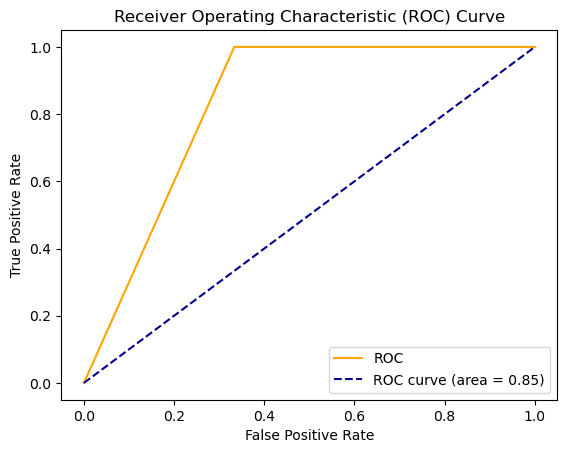

In [58]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = 0.85)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<Axes: >

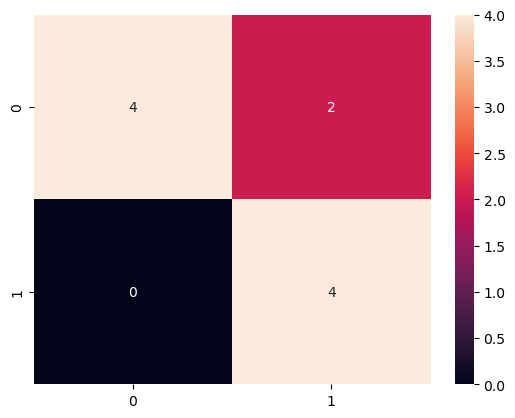

In [59]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

                          Name:Shreya Kumari
                               Roll.no:13222